### Imports

In [1]:
import functools as ft
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bagpy import bagreader

### Load data from csv

In [2]:
b = bagreader('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46.bag')

[INFO]  Data folder ../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46 already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/Servo_data,kin_odom_msg/Measurements,630,20.770462
1,/cmd_vel,geometry_msgs/Twist,1990,68.413649
2,/filter/quaternion,geometry_msgs/QuaternionStamped,3068,299.059109
3,/ground,std_msgs/String,2,0.802389
4,/imu/acceleration,geometry_msgs/Vector3Stamped,3062,305.818739
5,/imu/angular_velocity,geometry_msgs/Vector3Stamped,3062,305.997228
6,/imu/data,sensor_msgs/Imu,3068,296.438194
7,/imu/mag,geometry_msgs/Vector3Stamped,3062,302.619336
8,/imu/time_ref,sensor_msgs/TimeReference,3062,303.539152
9,/odom,nav_msgs/Odometry,1582,54.264290


In [4]:
cmd_vel = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/cmd_vel.csv')
filter_quaternion = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/filter-quaternion.csv')
ground = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/ground.csv')
imu_acceleration = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/imu-acceleration.csv')
imu_angular_velocity = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/imu-angular_velocity.csv')
imu_data = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/imu-data.csv')
imu_mag = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/imu-mag.csv')
imu_time_ref = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/imu-time_ref.csv')
odom = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/odom.csv')
rosout = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/rosout.csv')
rousout_agg = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/rosout_agg.csv')
servo_data = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/Servo_data.csv')
tf = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/tf.csv')
turtlebot_burger_odom = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/turtlebot_burger-odom.csv')
velocity = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/velocity.csv')
vicon_turtlebot_burger = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/vicon-turtlebot_burger.csv')
vicon_unlabeled_markers = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/vicon-unlabeled_markers.csv')
wheel_feedback = pd.read_csv('../data/pb_rosbag/Linoleum/osemka/2023-01-14-16-18-46/wheel_feedback.csv')

In [5]:
imu_data.describe()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,orientation_covariance_1,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
count,3.068000e+03,3.068000e+03,3.068000e+03,3.068000e+03,3068.000000,3068.000000,3068.000000,3068.000000,3068.0,3068.0,...,3068.000000,3068.0,3068.0,3068.0,3068.0,3068.0,3068.0,3068.0,3068.0,3068.0
mean,1.673710e+09,1.459558e+06,1.673710e+09,5.001106e+08,-0.001527,-0.002111,0.254064,-0.551419,0.0,0.0,...,10.002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,9.121387e+00,8.857996e+02,9.123707e+00,2.895040e+08,0.004327,0.005113,0.679839,0.411536,0.0,0.0,...,0.848753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.673710e+09,1.458025e+06,1.673710e+09,5.169715e+06,-0.010522,-0.010391,-0.938111,-0.999982,0.0,0.0,...,6.112290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.673710e+09,1.458792e+06,1.673710e+09,2.473488e+08,-0.004897,-0.005895,-0.395727,-0.913151,0.0,0.0,...,9.518547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.673710e+09,1.459558e+06,1.673710e+09,4.973330e+08,-0.001459,-0.003852,0.419822,-0.670934,0.0,0.0,...,10.026904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.673710e+09,1.460325e+06,1.673710e+09,7.472291e+08,0.002251,0.001147,0.941771,-0.297585,0.0,0.0,...,10.500356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.673710e+09,1.461092e+06,1.673710e+09,9.970295e+08,0.007195,0.009655,0.999991,0.397531,0.0,0.0,...,15.339157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Topics visualization

In [5]:
cmd_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.673710e+09,0.00,0.0,0.0,0.0,0.0,0.000000
1,1.673710e+09,0.00,0.0,0.0,0.0,0.0,0.000000
2,1.673710e+09,0.09,0.0,0.0,0.0,0.0,0.600161
3,1.673710e+09,0.09,0.0,0.0,0.0,0.0,0.580990
4,1.673710e+09,0.09,0.0,0.0,0.0,0.0,0.566352
...,...,...,...,...,...,...,...
1985,1.673710e+09,0.09,0.0,0.0,0.0,0.0,-0.450334
1986,1.673710e+09,0.09,0.0,0.0,0.0,0.0,-0.493904
1987,1.673710e+09,0.09,0.0,0.0,0.0,0.0,-0.473333
1988,1.673710e+09,0.09,0.0,0.0,0.0,0.0,-0.442051


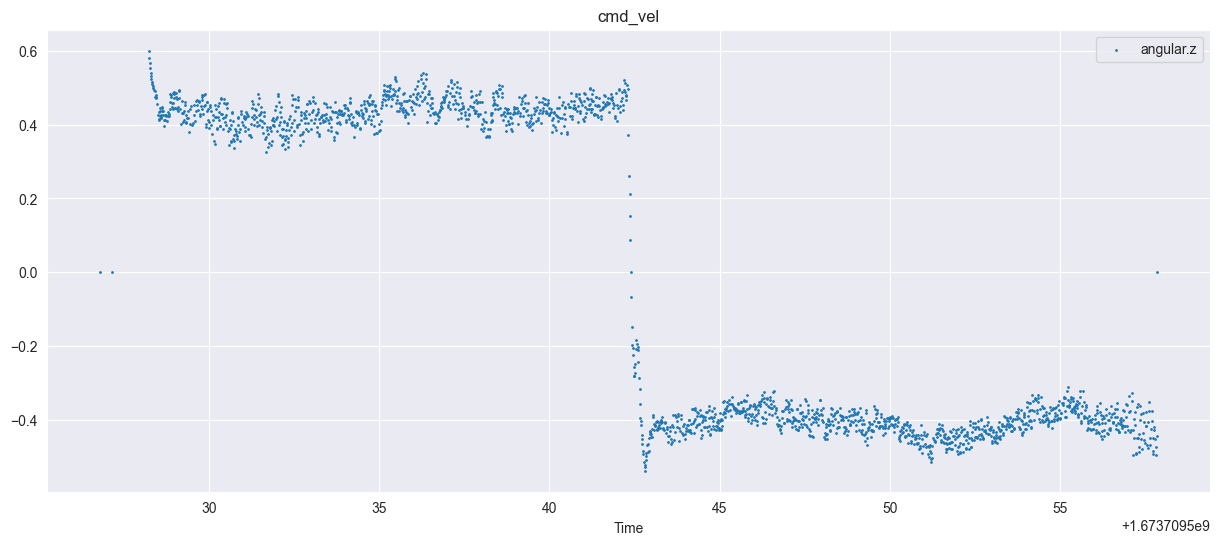

In [6]:
plt.rcParams['figure.figsize'] = [15, 6]
# plt.scatter(x=cmd_vel['Time'], y=cmd_vel['linear.x'], s=1, label='linear.x')
# plt.scatter(x=cmd_vel['Time'], y=cmd_vel['linear.y'], s=1, label='linear.y')
# plt.scatter(x=cmd_vel['Time'], y=cmd_vel['linear.z'], s=1, label='linear.z')
# plt.scatter(x=cmd_vel['Time'], y=cmd_vel['angular.x'], s=1, label='angular.x')
# plt.scatter(x=cmd_vel['Time'], y=cmd_vel['angular.y'], s=1, label='angular.y')
plt.scatter(x=cmd_vel['Time'], y=cmd_vel['angular.z'], s=1, label='angular.z')
plt.title('cmd_vel')
plt.xlabel('Time')
plt.legend()
plt.show()

In [7]:
filter_quaternion

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,quaternion.x,quaternion.y,quaternion.z,quaternion.w
0,1.673710e+09,1458023,1673709526,7073625,imu_link,-0.004877,0.008430,0.977823,0.209205
1,1.673710e+09,1458024,1673709526,7094299,imu_link,-0.004868,0.008440,0.977812,0.209260
2,1.673710e+09,1458025,1673709526,7103392,imu_link,-0.004844,0.008454,0.977799,0.209320
3,1.673710e+09,1458026,1673709526,7111355,imu_link,-0.004837,0.008451,0.977787,0.209374
4,1.673710e+09,1458027,1673709526,7119333,imu_link,-0.004840,0.008450,0.977776,0.209425
...,...,...,...,...,...,...,...,...,...
3063,1.673710e+09,1461086,1673709557,506076480,imu_link,-0.001730,0.003397,0.917877,0.396846
3064,1.673710e+09,1461087,1673709557,506092374,imu_link,-0.001556,0.003526,0.917717,0.397217
3065,1.673710e+09,1461088,1673709557,506100599,imu_link,-0.001521,0.003820,0.917617,0.397445
3066,1.673710e+09,1461089,1673709557,506108585,imu_link,-0.001557,0.003952,0.917579,0.397531


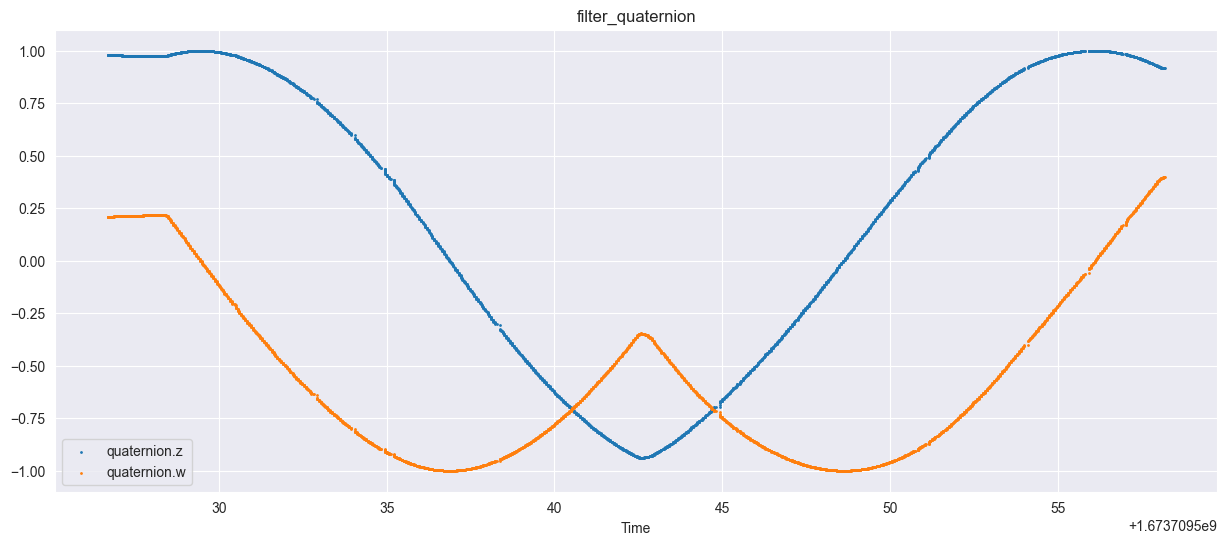

In [8]:
plt.rcParams['figure.figsize'] = [15, 6]
# plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion['quaternion.x'], s=1, label='quaternion.x')
# plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion['quaternion.y'], s=1, label='quaternion.y')
plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion['quaternion.z'], s=1, label='quaternion.z')
plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion['quaternion.w'], s=1, label='quaternion.w')
plt.title('filter_quaternion')
plt.xlabel('Time')
plt.legend()
plt.show()

In [9]:
imu_acceleration

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673710e+09,1458031,1673709526,57986776,imu_link,-0.080281,0.144533,10.033216
1,1.673710e+09,1458032,1673709526,58001819,imu_link,-0.083087,0.146638,10.012651
2,1.673710e+09,1458033,1673709526,58010056,imu_link,-0.082985,0.150829,10.019607
3,1.673710e+09,1458034,1673709526,58017927,imu_link,-0.107023,0.142482,10.010639
4,1.673710e+09,1458035,1673709526,58025452,imu_link,-0.091056,0.142806,10.022118
...,...,...,...,...,...,...,...,...
3057,1.673710e+09,1461088,1673709557,506076480,imu_link,-0.390987,0.058410,10.013300
3058,1.673710e+09,1461089,1673709557,506092374,imu_link,-0.376841,0.088510,9.779983
3059,1.673710e+09,1461090,1673709557,506100599,imu_link,-0.212219,0.189846,9.934262
3060,1.673710e+09,1461091,1673709557,506108585,imu_link,-0.167956,0.373394,10.049113


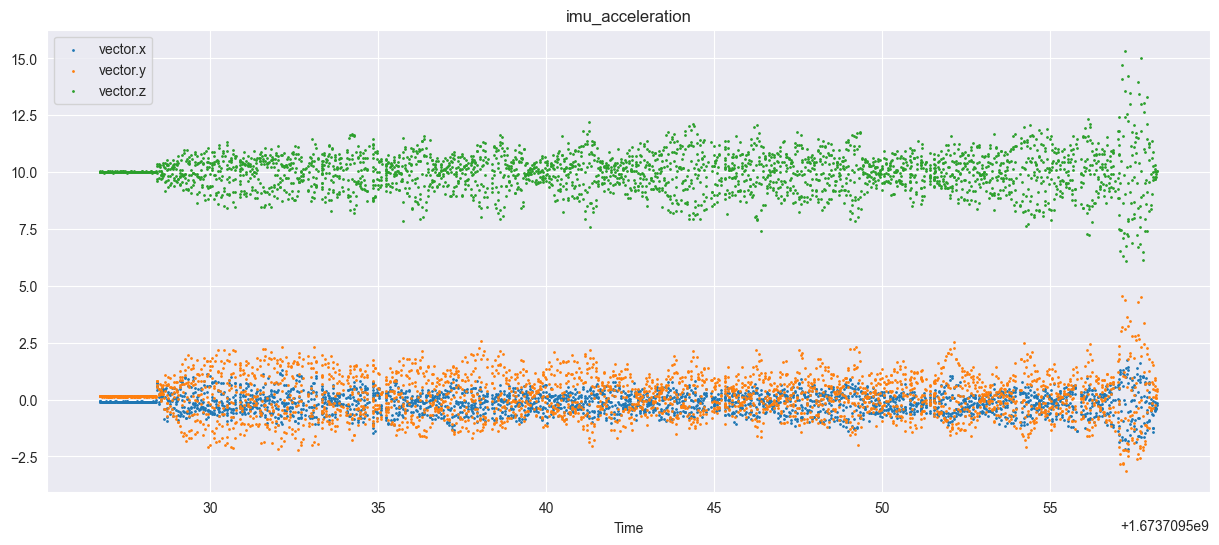

In [10]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration['vector.x'], s=1, label='vector.x')
plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration['vector.y'], s=1, label='vector.y')
plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration['vector.z'], s=1, label='vector.z')
plt.title('imu_acceleration')
plt.xlabel('Time')
plt.legend()
plt.show()

In [11]:
imu_angular_velocity

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673710e+09,1458031,1673709526,57986776,imu_link,0.011907,-0.000857,-0.013538
1,1.673710e+09,1458032,1673709526,58001819,imu_link,0.012663,-0.001181,-0.014108
2,1.673710e+09,1458033,1673709526,58010056,imu_link,0.012237,-0.000575,-0.013113
3,1.673710e+09,1458034,1673709526,58017927,imu_link,0.011892,-0.001629,-0.012078
4,1.673710e+09,1458035,1673709526,58025452,imu_link,0.011166,-0.000311,-0.012219
...,...,...,...,...,...,...,...,...
3057,1.673710e+09,1461088,1673709557,506076480,imu_link,-0.009360,-0.024467,-0.088560
3058,1.673710e+09,1461089,1673709557,506092374,imu_link,0.025074,-0.013294,-0.078857
3059,1.673710e+09,1461090,1673709557,506100599,imu_link,0.034097,0.004222,-0.060325
3060,1.673710e+09,1461091,1673709557,506108585,imu_link,0.024255,-0.001986,-0.038178


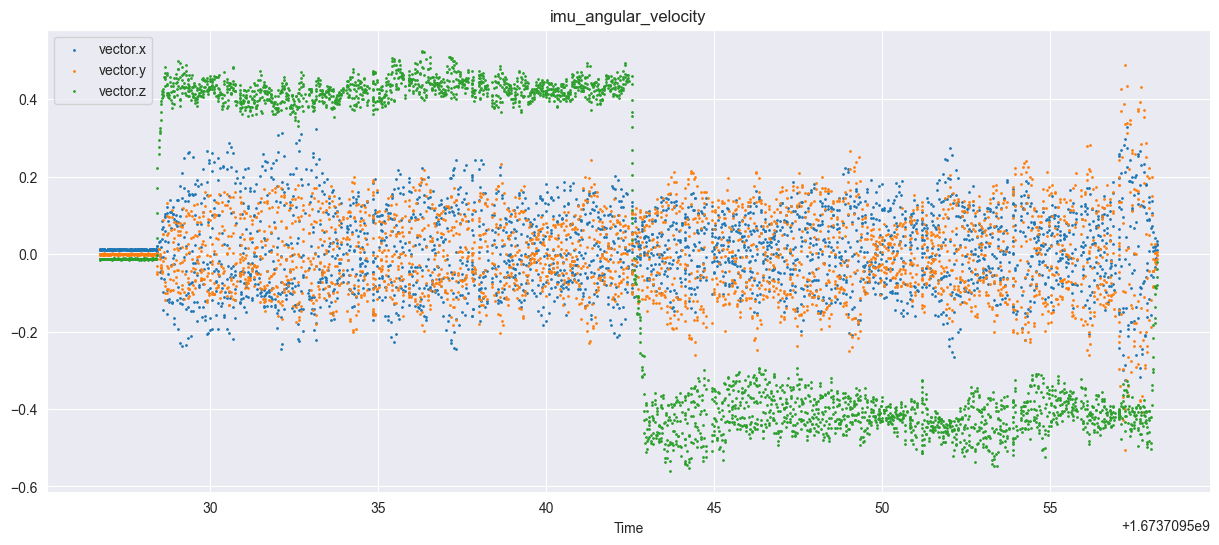

In [12]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity['vector.x'], s=1, label='vector.x')
plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity['vector.y'], s=1, label='vector.y')
plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity['vector.z'], s=1, label='vector.z')
plt.title('imu_angular_velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

In [13]:
imu_mag

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673710e+09,1458031,1673709526,57986776,imu_link,1.178651,0.915978,-1.486814
1,1.673710e+09,1458032,1673709526,58001819,imu_link,1.177841,0.894546,-1.475932
2,1.673710e+09,1458033,1673709526,58010056,imu_link,1.153492,0.916110,-1.463205
3,1.673710e+09,1458034,1673709526,58017927,imu_link,1.162381,0.930557,-1.468609
4,1.673710e+09,1458035,1673709526,58025452,imu_link,1.186943,0.906480,-1.486604
...,...,...,...,...,...,...,...,...
3057,1.673710e+09,1461088,1673709557,506076480,imu_link,1.157285,1.085812,-1.401766
3058,1.673710e+09,1461089,1673709557,506092374,imu_link,1.128675,1.097807,-1.383652
3059,1.673710e+09,1461090,1673709557,506100599,imu_link,1.146636,1.124352,-1.391776
3060,1.673710e+09,1461091,1673709557,506108585,imu_link,1.160389,1.109793,-1.407354


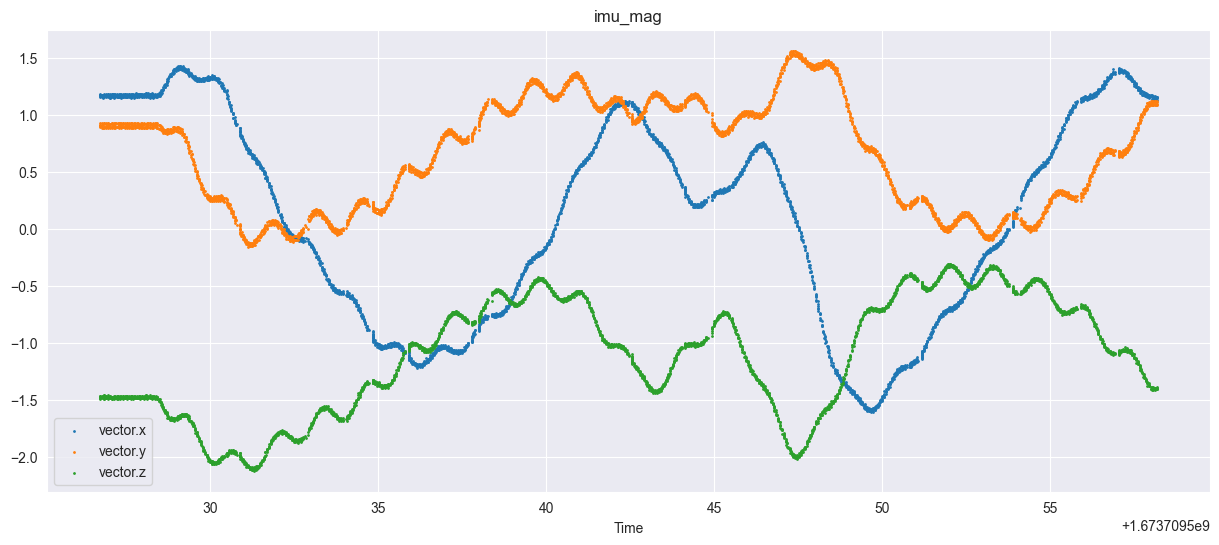

In [14]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=imu_mag['Time'], y=imu_mag['vector.x'], s=1, label='vector.x')
plt.scatter(x=imu_mag['Time'], y=imu_mag['vector.y'], s=1, label='vector.y')
plt.scatter(x=imu_mag['Time'], y=imu_mag['vector.z'], s=1, label='vector.z')
plt.title('imu_mag')
plt.xlabel('Time')
plt.legend()
plt.show()

In [15]:
odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.673710e+09,743197,1673709525,895565312,odom,base_link,0.077483,-0.016683,0.0,0.0,...,-0.000644,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.673710e+09,743198,1673709525,915634307,odom,base_link,0.077483,-0.016683,0.0,0.0,...,-0.000644,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.673710e+09,743199,1673709525,935601994,odom,base_link,0.077483,-0.016683,0.0,0.0,...,-0.000644,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.673710e+09,743200,1673709525,955565372,odom,base_link,0.077483,-0.016683,0.0,0.0,...,-0.000644,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.673710e+09,743201,1673709525,975680167,odom,base_link,0.077483,-0.016683,0.0,0.0,...,-0.000644,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1.673710e+09,744774,1673709557,435602244,odom,base_link,0.050444,-0.002965,0.0,0.0,...,-0.065723,0.997838,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.023939,0.0,0.0,0.0,0.0,-0.114938,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1578,1.673710e+09,744775,1673709557,455608245,odom,base_link,0.050919,-0.003028,0.0,0.0,...,-0.066870,0.997762,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.023939,0.0,0.0,0.0,0.0,-0.114938,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1579,1.673710e+09,744776,1673709557,475686738,odom,base_link,0.051395,-0.003092,0.0,0.0,...,-0.068021,0.997684,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.023939,0.0,0.0,0.0,0.0,-0.114938,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1580,1.673710e+09,744777,1673709557,495610050,odom,base_link,0.051587,-0.003118,0.0,0.0,...,-0.068574,0.997646,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.009694,0.0,0.0,0.0,0.0,-0.055615,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


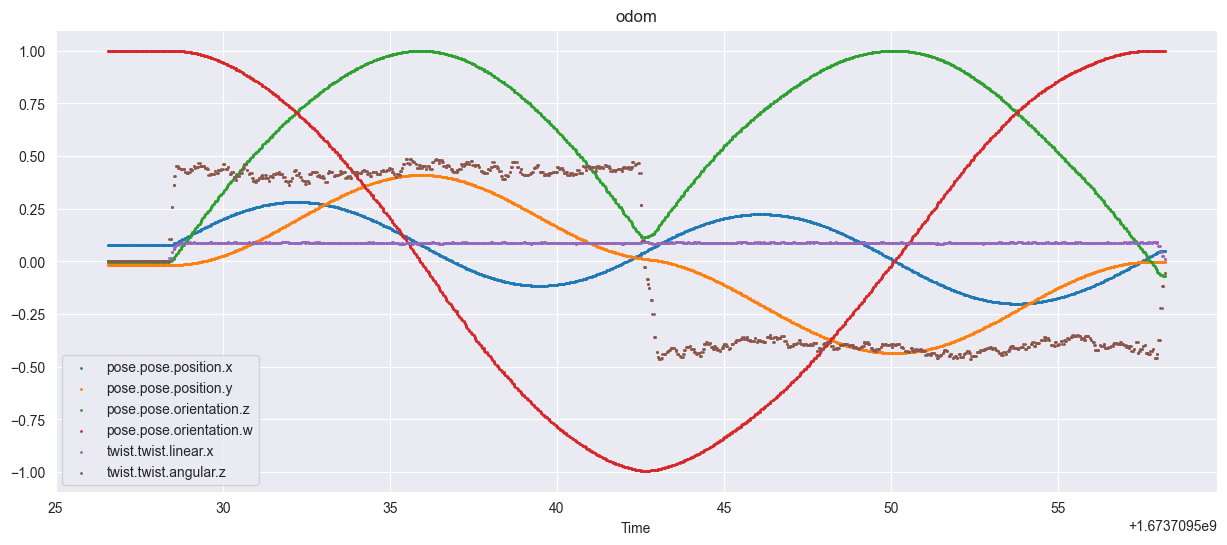

In [16]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=odom['Time'], y=odom['pose.pose.position.x'], s=1, label='pose.pose.position.x')
plt.scatter(x=odom['Time'], y=odom['pose.pose.position.y'], s=1, label='pose.pose.position.y')
# plt.scatter(x=odom['Time'], y=odom['pose.pose.position.z'], s=1, label='pose.pose.position.z')
# plt.scatter(x=odom['Time'], y=odom['pose.pose.orientation.x'], s=1, label='pose.pose.orientation.x')
# plt.scatter(x=odom['Time'], y=odom['pose.pose.orientation.y'], s=1, label='pose.pose.orientation.y')
plt.scatter(x=odom['Time'], y=odom['pose.pose.orientation.z'], s=1, label='pose.pose.orientation.z')
plt.scatter(x=odom['Time'], y=odom['pose.pose.orientation.w'], s=1, label='pose.pose.orientation.w')
plt.scatter(x=odom['Time'], y=odom['twist.twist.linear.x'], s=1, label='twist.twist.linear.x')
# plt.scatter(x=odom['Time'], y=odom['twist.twist.linear.y'], s=1, label='twist.twist.linear.y')
# plt.scatter(x=odom['Time'], y=odom['twist.twist.linear.z'], s=1, label='twist.twist.linear.z')
# plt.scatter(x=odom['Time'], y=odom['twist.twist.angular.x'], s=1, label='twist.twist.angular.x')
# plt.scatter(x=odom['Time'], y=odom['twist.twist.angular.y'], s=1, label='twist.twist.angular.y')
plt.scatter(x=odom['Time'], y=odom['twist.twist.angular.z'], s=1, label='twist.twist.angular.z')
plt.title('odom')
plt.xlabel('Time')
plt.legend()
plt.show()

In [17]:
turtlebot_burger_odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.673710e+09,1554329,1673709526,532273054,vicon,turtlebot_burger/base_link,0.077498,-0.016673,0.191459,0.000559,...,-0.000593,0.999999,"(9.944625088871746e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.001542,0.000202,0.000183,-0.018437,-0.002210,0.002447,"(0.011754005857454406, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,1.673710e+09,1554330,1673709526,543422937,vicon,turtlebot_burger/base_link,0.077471,-0.016668,0.191512,0.000313,...,-0.000665,0.999999,"(9.942784579403101e-09, 0.0, 0.0, 0.0, 0.0, 0....",-0.001849,0.000430,0.004063,-0.043992,0.043688,-0.012876,"(0.011815089390761434, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,1.673710e+09,1554331,1673709526,554259062,vicon,turtlebot_burger/base_link,0.077470,-0.016666,0.191487,0.000640,...,-0.000649,0.999999,"(9.940249725549573e-09, 0.0, 0.0, 0.0, 0.0, 0....",-0.000329,0.000194,-0.001286,0.060329,-0.027325,0.002854,"(0.01190533436061922, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1.673710e+09,1554332,1673709526,564744949,vicon,turtlebot_burger/base_link,0.077474,-0.016669,0.191494,0.000540,...,-0.000625,0.999999,"(9.937308588492871e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.000248,-0.000251,0.000301,-0.019136,0.009936,0.004511,"(0.01201436082597389, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,1.673710e+09,1554333,1673709526,574861050,vicon,turtlebot_burger/base_link,0.077480,-0.016648,0.191484,0.000696,...,-0.000750,0.999999,"(9.934009289035318e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.000570,0.001740,-0.000762,0.030736,-0.006967,-0.024600,"(0.012139751539452216, 0.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,1.673710e+09,1557488,1673709558,123081923,vicon,turtlebot_burger/base_link,0.091035,-0.020145,0.191609,0.001656,...,-0.010271,0.999945,"(9.934031560803392e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.005114,-0.003513,-0.001848,0.015897,-0.023463,-0.067147,"(0.012166952995550331, 0.0, 0.0, 0.0, 0.0, 0.0..."
3160,1.673710e+09,1557489,1673709558,133124113,vicon,turtlebot_burger/base_link,0.091122,-0.020211,0.191613,0.001845,...,-0.010255,0.999945,"(9.933916361802604e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.007983,-0.006070,-0.000015,0.037945,0.019627,0.003216,"(0.012169932052337459, 0.0, 0.0, 0.0, 0.0, 0.0..."
3161,1.673710e+09,1557490,1673709558,143171072,vicon,turtlebot_burger/base_link,0.091172,-0.020215,0.191566,0.001845,...,-0.010476,0.999943,"(9.933981023416675e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.005521,-0.001417,-0.003817,-0.000485,-0.035356,-0.044109,"(0.01216833834569355, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3162,1.673710e+09,1557491,1673709558,153194904,vicon,turtlebot_burger/base_link,0.091199,-0.020219,0.191588,0.001743,...,-0.010307,0.999945,"(9.933725022075961e-09, 0.0, 0.0, 0.0, 0.0, 0....",0.003238,-0.000549,0.001156,-0.020127,0.023201,0.033897,"(0.012176462134550814, 0.0, 0.0, 0.0, 0.0, 0.0..."


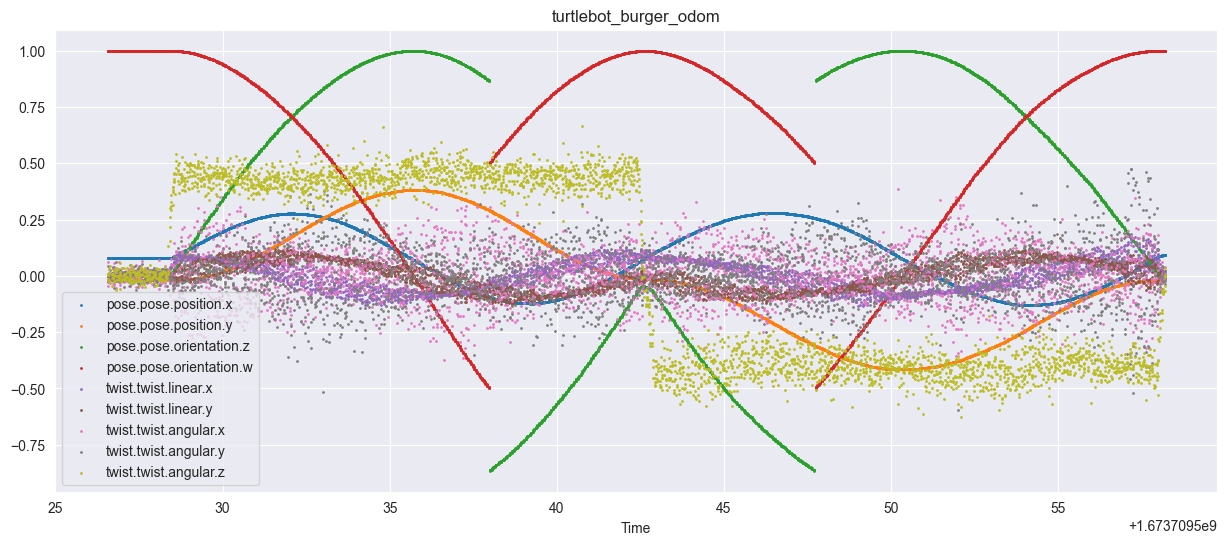

In [18]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.position.x'], s=1, label='pose.pose.position.x')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.position.y'], s=1, label='pose.pose.position.y')
# plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.position.z'], s=1, label='pose.pose.position.z')
# plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.orientation.x'], s=1, label='pose.pose.orientation.x')
# plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.orientation.y'], s=1, label='pose.pose.orientation.y')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.orientation.z'], s=1, label='pose.pose.orientation.z')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['pose.pose.orientation.w'], s=1, label='pose.pose.orientation.w')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.linear.x'], s=1, label='twist.twist.linear.x')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.linear.y'], s=1, label='twist.twist.linear.y')
# plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.linear.z'], s=1, label='twist.twist.linear.z')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.angular.x'], s=1, label='twist.twist.angular.x')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.angular.y'], s=1, label='twist.twist.angular.y')
plt.scatter(x=turtlebot_burger_odom['Time'], y=turtlebot_burger_odom['twist.twist.angular.z'], s=1, label='twist.twist.angular.z')
plt.title('turtlebot_burger_odom')
plt.xlabel('Time')
plt.legend()
plt.show()

In [19]:
vicon_turtlebot_burger

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,name,occluded,position.x,position.y,position.z,orientation.x,orientation.y,orientation.z,orientation.w,markers
0,1.673710e+09,1554412,1673709526,520895958,vicon,turtlebot_burger,False,0.077475,-0.016677,0.191454,0.000664,0.001280,-0.000606,0.999999,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
1,1.673710e+09,1554413,1673709526,532273054,vicon,turtlebot_burger,False,0.077498,-0.016673,0.191459,0.000559,0.001268,-0.000593,0.999999,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
2,1.673710e+09,1554414,1673709526,543422937,vicon,turtlebot_burger,False,0.077470,-0.016668,0.191512,0.000313,0.001511,-0.000665,0.999999,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
3,1.673710e+09,1554415,1673709526,554259062,vicon,turtlebot_burger,False,0.077470,-0.016666,0.191487,0.000640,0.001363,-0.000649,0.999999,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
4,1.673710e+09,1554416,1673709526,564744949,vicon,turtlebot_burger,False,0.077474,-0.016670,0.191494,0.000540,0.001415,-0.000625,0.999999,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,1.673710e+09,1557576,1673709558,163182974,vicon,turtlebot_burger,False,0.091205,-0.020204,0.191593,0.001847,0.001283,-0.010326,0.999944,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
3165,1.673710e+09,1557577,1673709558,173135996,vicon,turtlebot_burger,False,0.091203,-0.020186,0.191621,0.001476,0.001313,-0.010609,0.999942,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
3166,1.673710e+09,1557578,1673709558,183059931,vicon,turtlebot_burger,False,0.091215,-0.020209,0.191598,0.001589,0.001292,-0.010524,0.999943,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."
3167,1.673710e+09,1557579,1673709558,192987919,vicon,turtlebot_burger,False,0.091235,-0.020210,0.191558,0.001576,0.001149,-0.010628,0.999942,"[name: ""Unlabeled2210""\nsubject_name: ""turtleb..."


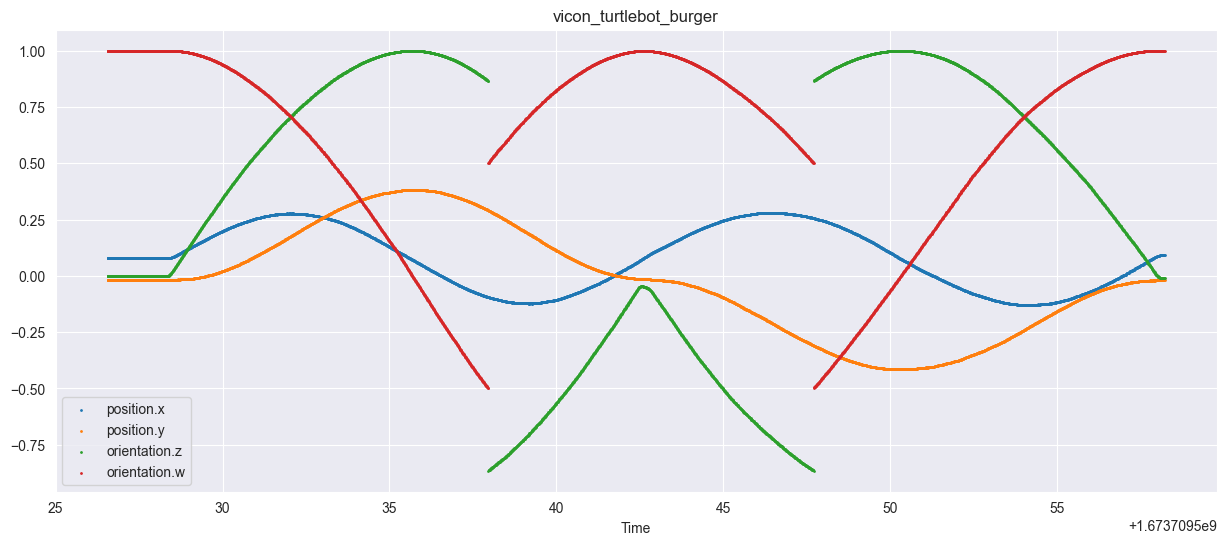

In [20]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['position.x'], s=1, label='position.x')
plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['position.y'], s=1, label='position.y')
# plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['position.z'], s=1, label='position.z')
# plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['orientation.x'], s=1, label='orientation.x')
# plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['orientation.y'], s=1, label='orientation.y')
plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['orientation.z'], s=1, label='orientation.z')
plt.scatter(x=vicon_turtlebot_burger['Time'], y=vicon_turtlebot_burger['orientation.w'], s=1, label='orientation.w')
plt.title('vicon_turtlebot_burger')
plt.xlabel('Time')
plt.legend()
plt.show()

In [21]:
servo_data

,Time,values
0,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: -7...
1,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: -7...
2,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: -7...
3,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: -7...
4,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: -7...
...,...,...
625,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: 8....
626,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: 4....
627,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: 2....
628,1.673710e+09,[ID: 1\nVoltage: 10.899999618530273\nAmper: 1....


In [22]:
velocity

,Time,values
0,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
1,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
2,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
3,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
4,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
...,...,...
629,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
630,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
631,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
632,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...


In [23]:
wheel_feedback

,Time,values
0,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
1,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
2,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
3,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
4,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.0\nst...
...,...,...
625,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 4.12470...
626,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 2.42206...
627,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 1.27098...
628,1.673710e+09,[ID: 1\nLinVelocity: 0.0\nAngVelocity: 0.50359...


### Refine data

In [24]:
time = cmd_vel['Time']

In [25]:
cmd_vel_refined = cmd_vel.drop(columns=['linear.y', 'linear.z', 'angular.x', 'angular.y']).set_index('Time')
filter_quaternion_refined = imu_data[['Time', 'orientation.z', 'orientation.w']].set_index('Time')
imu_acceleration_refined = imu_data[['Time', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']].set_index('Time')
imu_angular_velocity_refined = imu_data[['Time', 'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z']].set_index('Time')
imu_mag_refined = imu_mag.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id']).set_index('Time')
odom_refined = odom.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'child_frame_id', 'pose.covariance', 'twist.covariance',
                                  'pose.pose.position.z', 'pose.pose.orientation.x', 'pose.pose.orientation.y',
                                  'twist.twist.linear.y', 'twist.twist.linear.z', 'twist.twist.angular.x', 'twist.twist.angular.y']).set_index('Time')

In [26]:
dataframes = [cmd_vel_refined, filter_quaternion_refined, imu_acceleration_refined, imu_angular_velocity_refined, imu_mag_refined, odom_refined]
dataframe = ft.reduce(lambda left, right: pd.merge(left, right, how='outer', on='Time'), dataframes)
dataframe.ffill(inplace=True)
dataframe.bfill(inplace=True)
dataframe

,linear.x,angular.z,orientation.z,orientation.w,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,angular_velocity.x,angular_velocity.y,angular_velocity.z,vector.x,vector.y,vector.z,pose.pose.position.x,pose.pose.position.y,pose.pose.orientation.z,pose.pose.orientation.w,twist.twist.linear.x,twist.twist.angular.z
Time,,,,,,,,,,,,,,,,,,,
1.673710e+09,0.0,0.0,0.977823,0.209205,-0.089096,0.135197,10.014894,0.011374,0.001012,-0.012738,1.178651,0.915978,-1.486814,0.077483,-0.016683,-0.000644,1.000000,0.000000,0.000000
1.673710e+09,0.0,0.0,0.977823,0.209205,-0.089096,0.135197,10.014894,0.011374,0.001012,-0.012738,1.178651,0.915978,-1.486814,0.077483,-0.016683,-0.000644,1.000000,0.000000,0.000000
1.673710e+09,0.0,0.0,0.977823,0.209205,-0.089096,0.135197,10.014894,0.011374,0.001012,-0.012738,1.178651,0.915978,-1.486814,0.077483,-0.016683,-0.000644,1.000000,0.000000,0.000000
1.673710e+09,0.0,0.0,0.977823,0.209205,-0.089096,0.135197,10.014894,0.011374,0.001012,-0.012738,1.178651,0.915978,-1.486814,0.077483,-0.016683,-0.000644,1.000000,0.000000,0.000000
1.673710e+09,0.0,0.0,0.977823,0.209205,-0.089096,0.135197,10.014894,0.011374,0.001012,-0.012738,1.178651,0.915978,-1.486814,0.077483,-0.016683,-0.000644,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.673710e+09,0.0,0.0,0.917579,0.397531,-0.167956,0.373394,10.049113,0.024255,-0.001986,-0.038178,1.160389,1.109793,-1.407354,0.051395,-0.003092,-0.068021,0.997684,0.023939,-0.114938
1.673710e+09,0.0,0.0,0.917582,0.397524,-0.240568,0.458069,10.035980,0.009848,-0.001181,-0.021389,1.160389,1.109793,-1.407354,0.051395,-0.003092,-0.068021,0.997684,0.023939,-0.114938
1.673710e+09,0.0,0.0,0.917582,0.397524,-0.240568,0.458069,10.035980,0.009848,-0.001181,-0.021389,1.157093,1.088214,-1.401799,0.051395,-0.003092,-0.068021,0.997684,0.023939,-0.114938


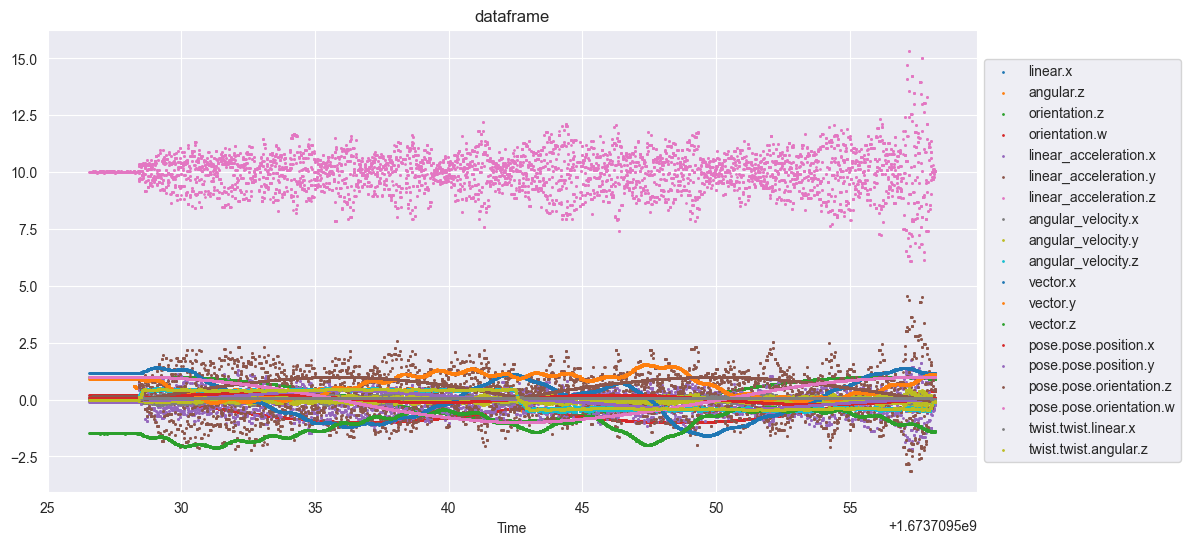

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe.columns:
    ax.scatter(x=dataframe.index, y=dataframe[column], s=1, label=column)
ax.set_title('dataframe')
ax.set_xlabel('Time')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Add data labels

### Correlation matrix

(19.5, -0.5)

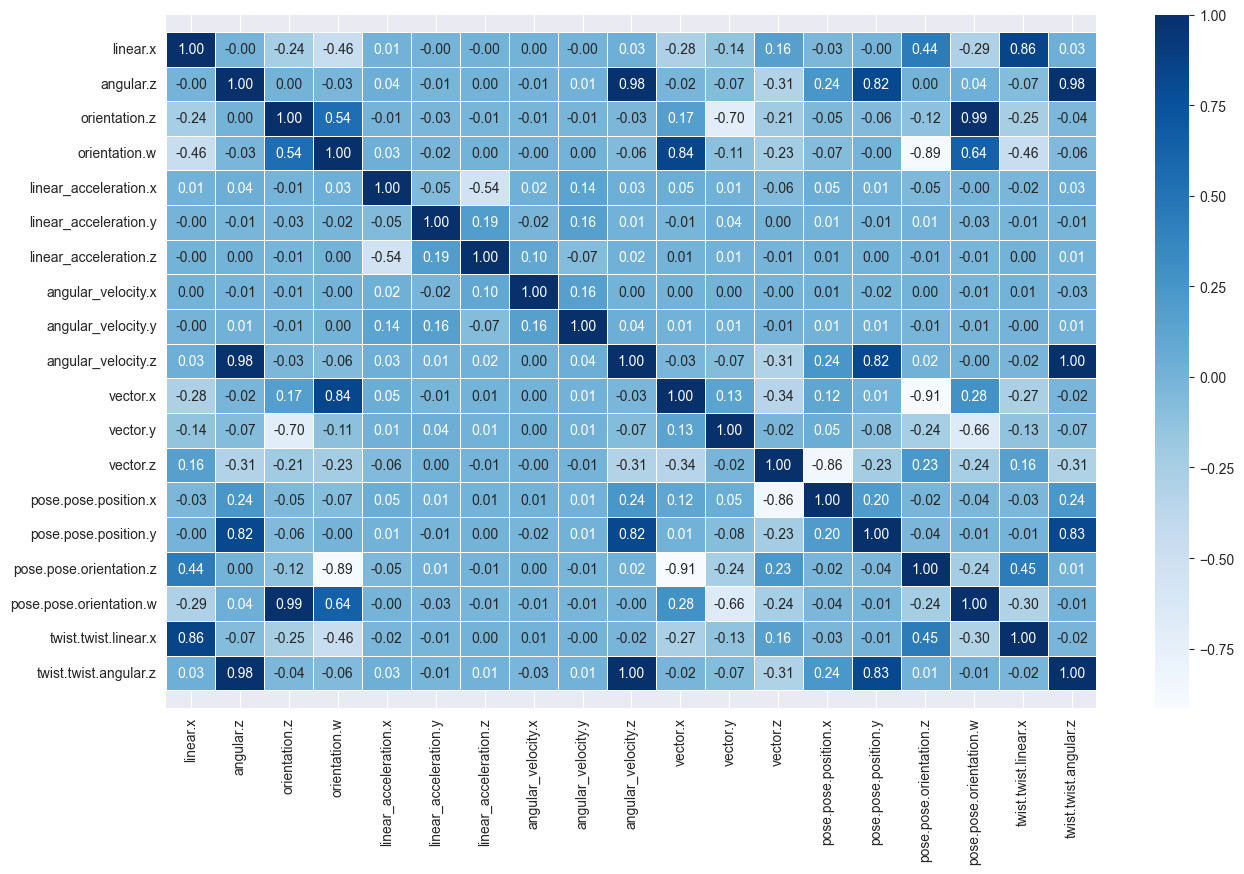

In [28]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation visualizations

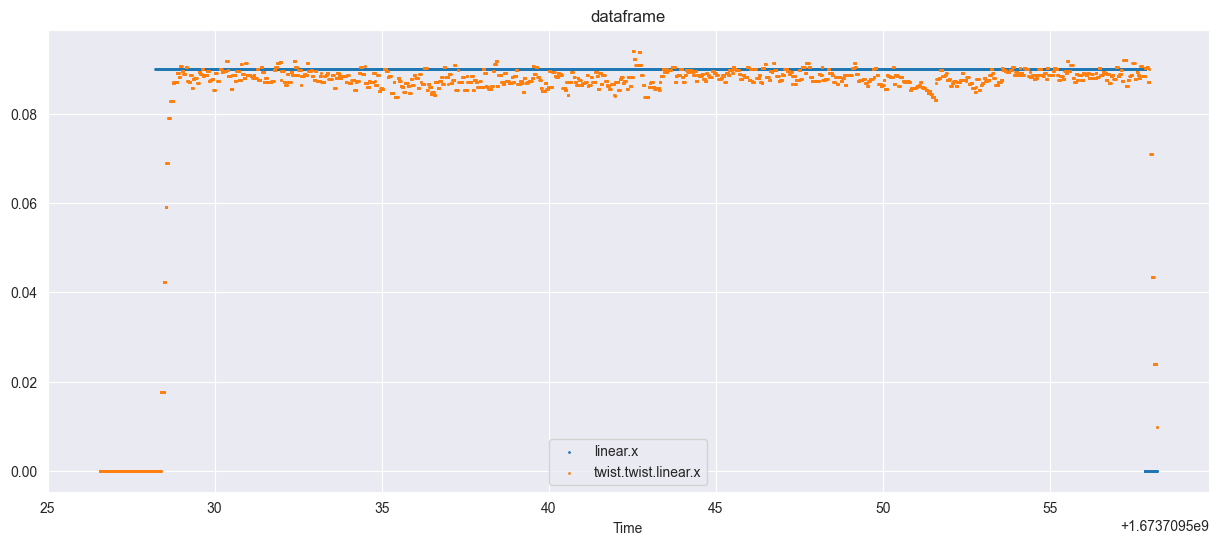

In [29]:
# cmd_vel / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['linear.x'], s=1, label='linear.x')
plt.scatter(x=dataframe.index, y=dataframe['twist.twist.linear.x'], s=1, label='twist.twist.linear.x')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

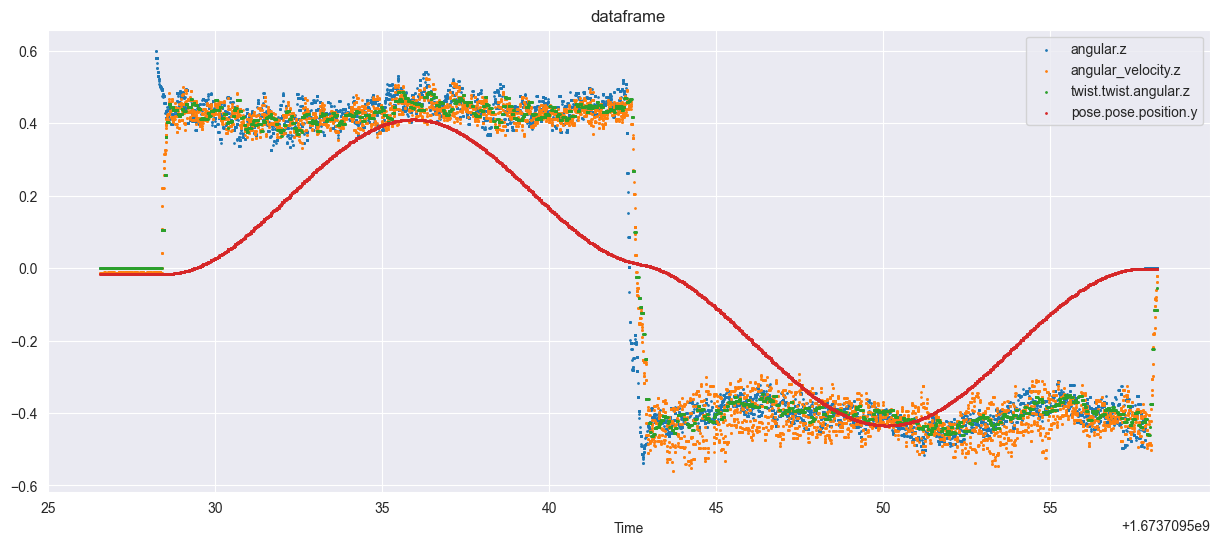

In [30]:
# cmd_vel / imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['angular.z'], s=1, label='angular.z')
plt.scatter(x=dataframe.index, y=dataframe['angular_velocity.z'], s=1, label='angular_velocity.z')
plt.scatter(x=dataframe.index, y=dataframe['twist.twist.angular.z'], s=1, label='twist.twist.angular.z')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.position.y'], s=1, label='pose.pose.position.y')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

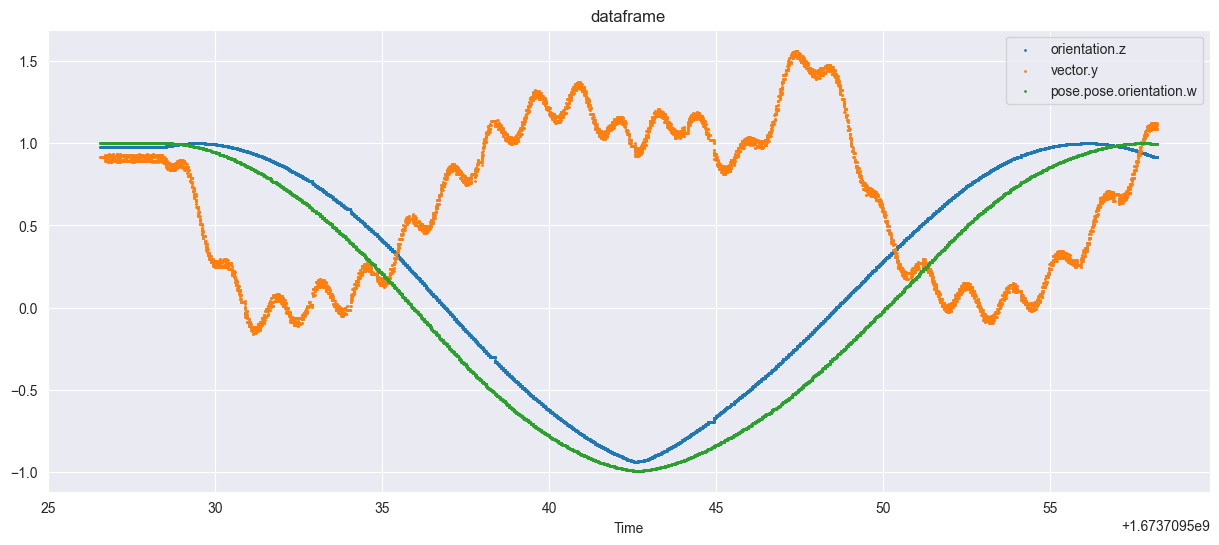

In [31]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['orientation.z'], s=1, label='orientation.z')
plt.scatter(x=dataframe.index, y=dataframe['vector.y'], s=1, label='vector.y')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.orientation.w'], s=1, label='pose.pose.orientation.w')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

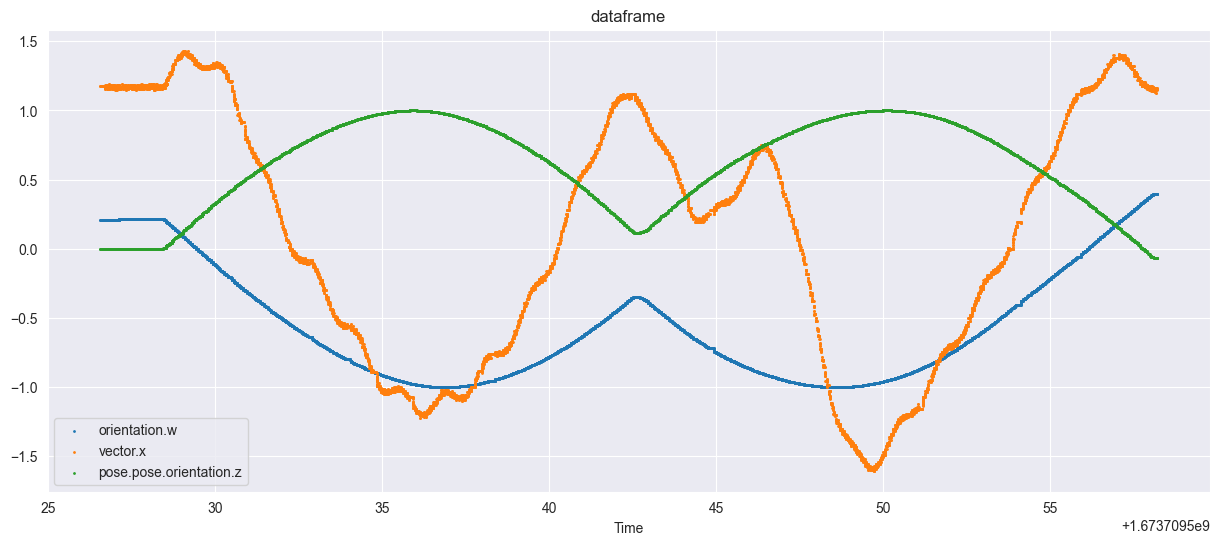

In [32]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['orientation.w'], s=1, label='orientation.w')
plt.scatter(x=dataframe.index, y=dataframe['vector.x'], s=1, label='vector.x')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.orientation.z'], s=1, label='pose.pose.orientation.z')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

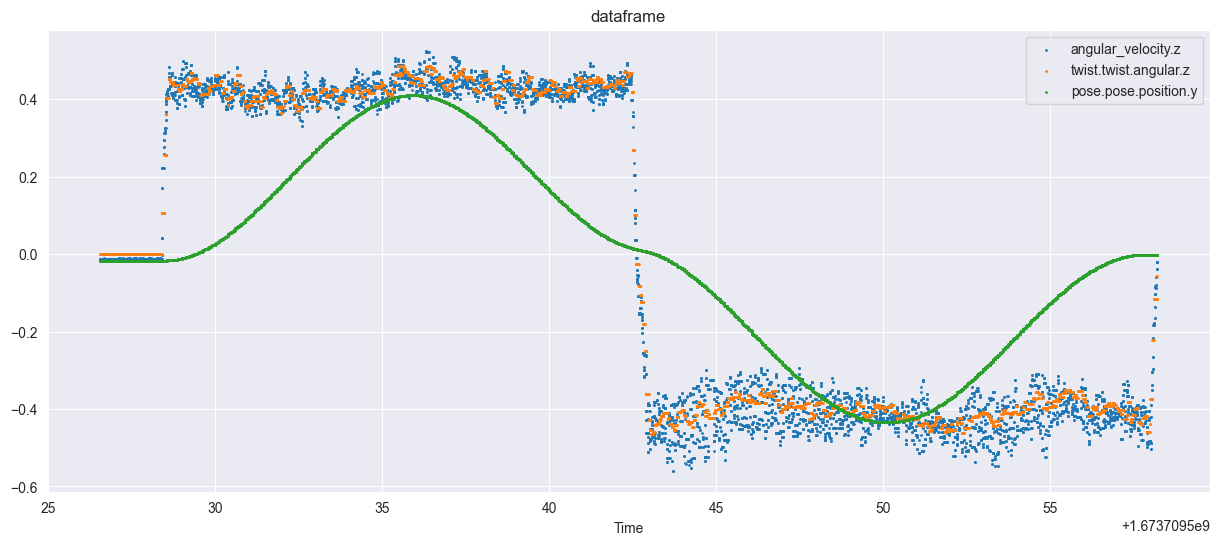

In [33]:
# imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['angular_velocity.z'], s=1, label='angular_velocity.z')
plt.scatter(x=dataframe.index, y=dataframe['twist.twist.angular.z'], s=1, label='twist.twist.angular.z')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.position.y'], s=1, label='pose.pose.position.y')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

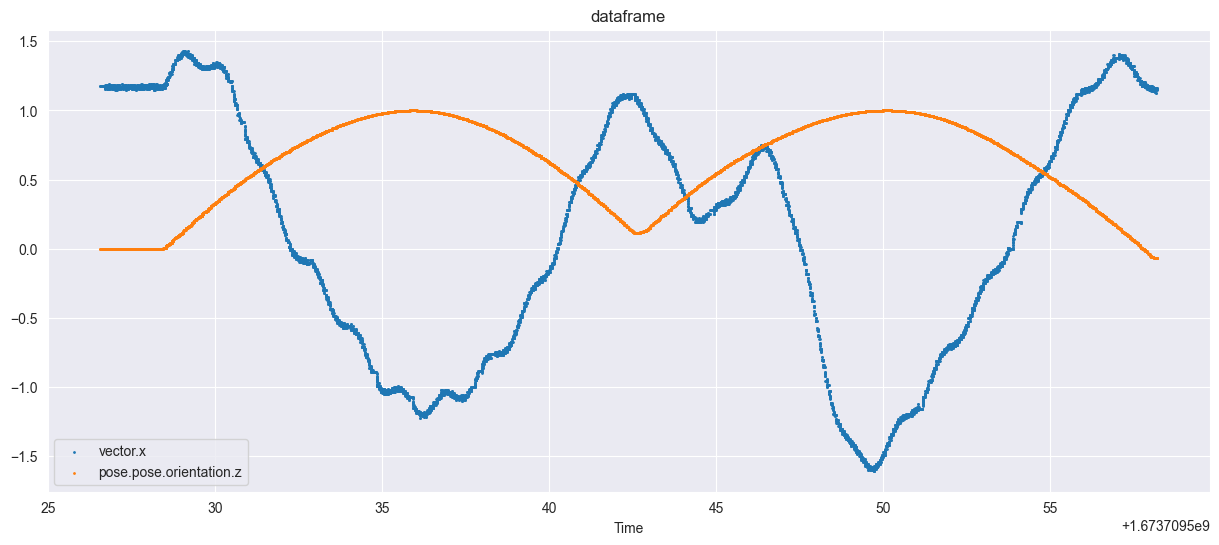

In [34]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['vector.x'], s=1, label='vector.x')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.orientation.z'], s=1, label='pose.pose.orientation.z')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

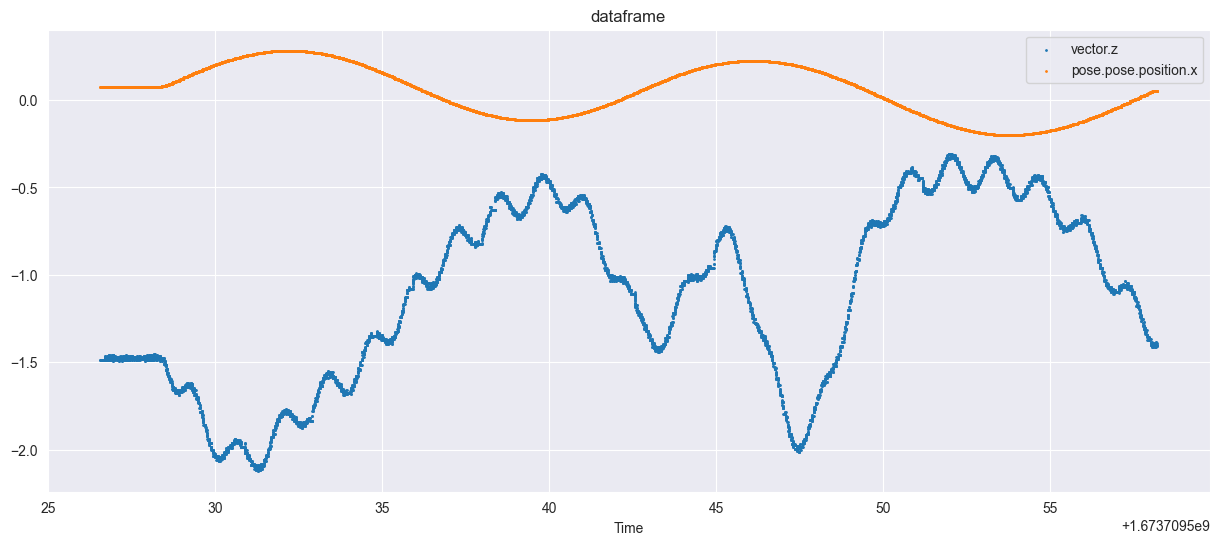

In [35]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(x=dataframe.index, y=dataframe['vector.z'], s=1, label='vector.z')
plt.scatter(x=dataframe.index, y=dataframe['pose.pose.position.x'], s=1, label='pose.pose.position.x')
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

### Target datasets

In [36]:
dataframe_no_odom = dataframe.drop(columns=['pose.pose.position.x', 'pose.pose.position.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w', 'twist.twist.linear.x', 'twist.twist.angular.z'])
dataframe_odom = odom_refined.copy()
dataframe_imu = dataframe[[*filter_quaternion_refined.columns, *imu_acceleration_refined.columns, *imu_angular_velocity_refined.columns, *imu_mag_refined.columns]]

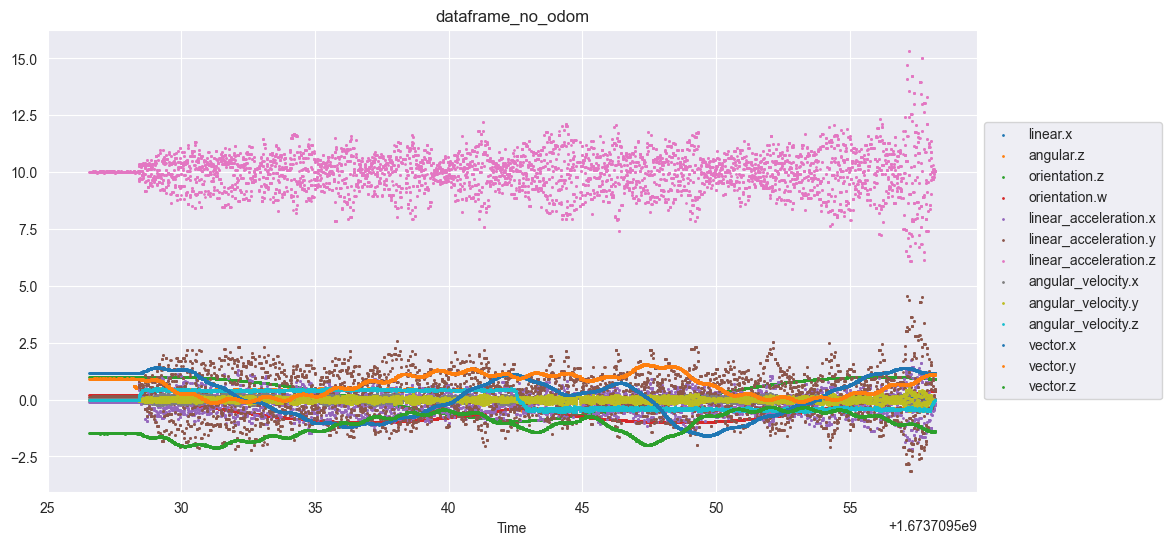

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_no_odom.columns:
    ax.scatter(x=dataframe_no_odom.index, y=dataframe_no_odom[column], s=1, label=column)
ax.set_title('dataframe_no_odom')
ax.set_xlabel('Time')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

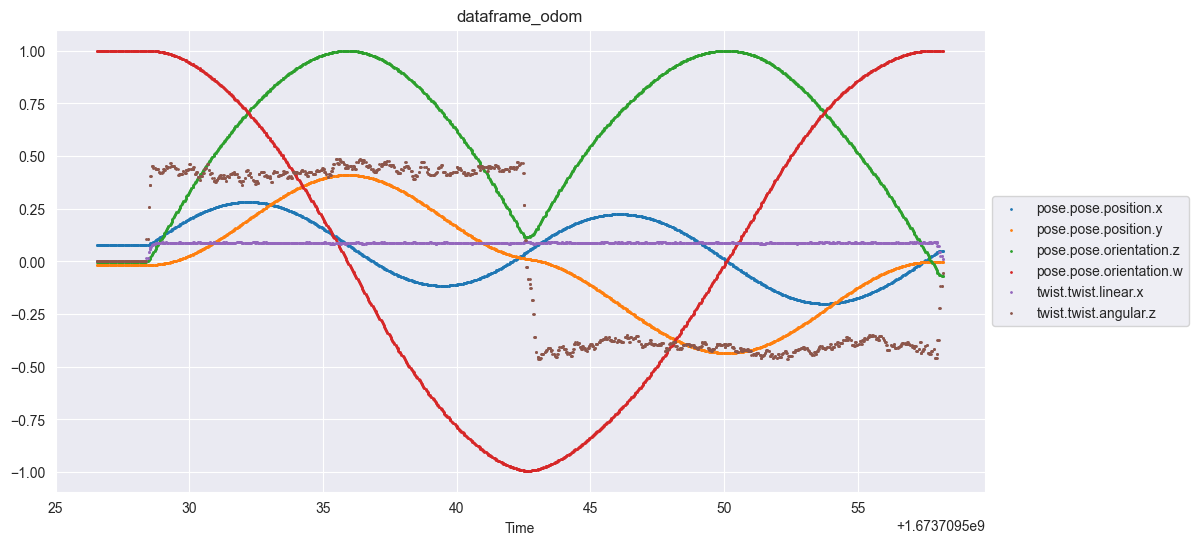

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_odom.columns:
    ax.scatter(x=dataframe_odom.index, y=dataframe_odom[column], s=1, label=column)
ax.set_title('dataframe_odom')
ax.set_xlabel('Time')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

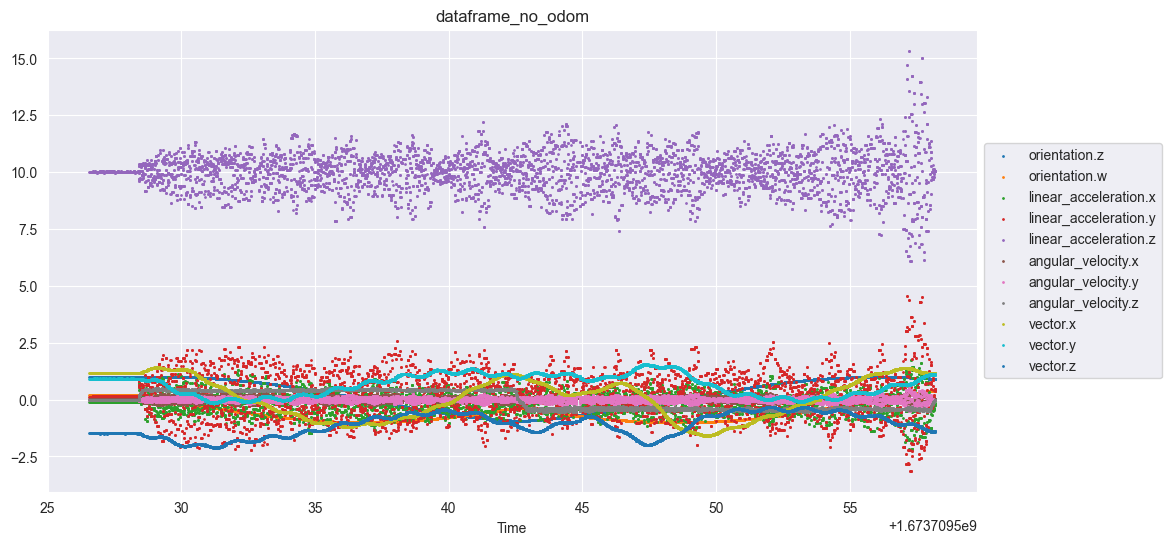

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_imu.columns:
    ax.scatter(x=dataframe_imu.index, y=dataframe_imu[column], s=1, label=column)
ax.set_title('dataframe_no_odom')
ax.set_xlabel('Time')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()